In [1]:
import pandas as pd                  # Para trabajar con datos
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos

import warnings
warnings.filterwarnings('ignore')  # Cállese, hombre horrible!

# Predicción con Cuadrados Mínimos Lineales
### Visualización

In [18]:
# Levanto los datos

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
df = pd.read_csv('datos.csv')

print("Las primeras 8 filas de los datos:", df.head(8))

('Las primeras 8 filas de los datos:',    x          y
0  0  19.184917
1  1  24.238282
2  2  25.516969
3  3  21.132415
4  4  18.515618
5  5  16.674168
6  6  21.679375
7  7  73.866501)


In [19]:
print("Decripción de los datos:", df.describe())

('Decripci\xc3\xb3n de los datos:',                x          y
count  60.000000  60.000000
mean   29.500000  28.975082
std    17.464249  13.771049
min     0.000000 -16.997848
25%    14.750000  23.874282
50%    29.500000  28.227643
75%    44.250000  33.404901
max    59.000000  73.866501)


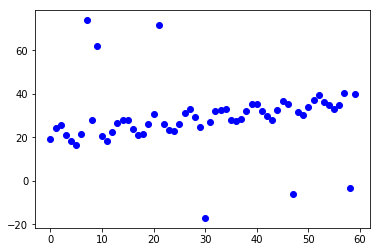

In [20]:
# Grafico los datos

plt.plot(df['x'], df['y'],'bo')

In [11]:
# Defino una clase para encapsular el ajuste por CML

class TP3:
    def __init__(self, func):
        self.family = func
        self.coef = None
        if func != 'pol':
            raise("ERROR: solo se fitear polinomios")

    def armar_matriz_A(self,s):
        c0 = np.ones(s.size)
        c1 = s
        c2 = s**2
        c3 = s**3
        c4 = s**4
        A = np.stack([c0,c1,c2,c3,c4],axis=-1)
        return A

    def fit(self,xi,yi):
        A = self.armar_matriz_A(xi)
        self.coef, _, _, _ = np.linalg.lstsq(A,yi)
        self.coef = np.flip(self.coef)

    def predict(self, xs):
        ys = np.polyval(self.coef,xs)
        return np.array(ys)
    

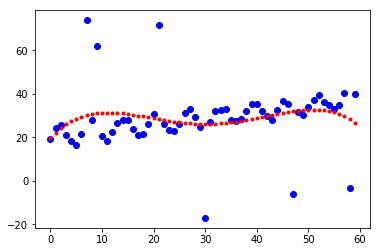

In [12]:
tp3pol = TP3('pol')

xi = np.asarray(df['x'])
yi = np.asarray(df['y'])
tp3pol.fit(xi, yi)

xs = xi
ys = tp3pol.predict(xi)


plt.plot(df['x'], df['y'],'bo')
plt.plot(xs,ys,'r.')

# %whos

### Limpieza

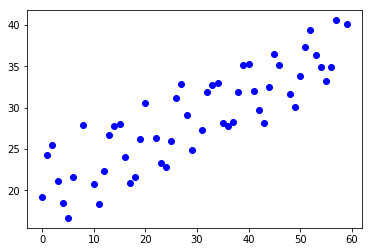

In [24]:
# Heurística para remover los outliers

def mascara_de_no_outliers(s):
    not_outliers = abs(s - s.mean()) <= 2*s.std()
    return not_outliers

mascara = mascara_de_no_outliers(df['y'])
# Me quedo solo con las filas que que no son outliers
df = df[mascara]
plt.plot(df['x'], df['y'],'bo')

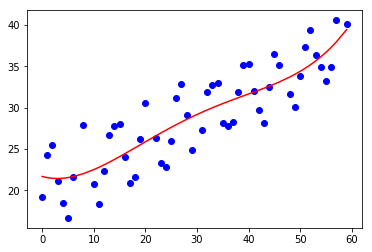

In [25]:
tp3pol.fit(df['x'], df['y'])
ys = tp3pol.predict(df['x'])

xs = df['x']
plt.plot(df['x'], df['y'],'bo')


plt.plot(xs, ys,'r')


### Predicción

In [26]:
# Graficos los datos reales para tenerlos como referencia

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    
    regr = TP3('pol')

    df_entrenamiento = df[df['x'].isin(rango_entrenamiento)]
    
    # 'Fiteo' los datos de entrenamiento
    regr.fit(df_entrenamiento['x'], df_entrenamiento['y'])
    
    # Grafico la aproximacion
    df_entrenamiento['pred'] = regr.predict(df_entrenamiento['x'])

    plt.plot(df_entrenamiento['x'], df_entrenamiento['pred'],'r-')

    ## Realizo predicciones
    
    df_prediccion = df[df['x'].isin(rango_prediccion)]
    
    # Predigo los datos de testeo
    df_prediccion['pred'] = regr.predict(df_prediccion['x'])
    
    # Grafico la prediccion
    plt.plot(df_prediccion['x'], df_prediccion['pred'], 'g-')

    ## Calculo el Error Cuadrático Medio
    ECM = sum((df_prediccion['pred'] - df_prediccion['y'])**2) / len(df_prediccion['y'])
    return ECM

def predecir(k):
    rango_entrenamiento = list(range(k-30,k))
    rango_prediccion = list(range(k,k+10))
    return entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion)



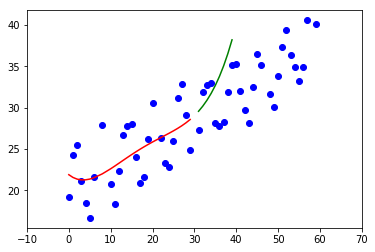

In [27]:
plt.plot(df['x'], df['y'],'bo')

predecir(30)
 
plt.xlim((-10,70))
plt.show()

### Validación

Error de predicción: 17.34
Error de predicción: 40.33
Error de predicción: 16.30


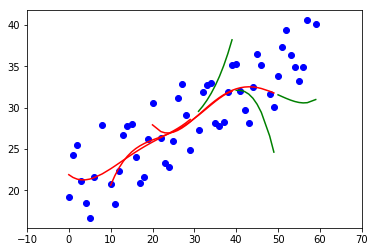

In [28]:
plt.plot(df['x'], df['y'],'bo')

ECM = predecir(40)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(50)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(30)
print("Error de predicción: {:.2f}".format(ECM))
    
plt.xlim((-10,70))
plt.show()

### Qué errores hice?







































* Cómo filtro los outliers?
* Está bien cómo calculo el ECM?
* Qué le falta a los gráficos?

## Consideraciones a tener en cuenta durante el TP
* ¿Quiero predecir comportamientos particulares o generales?
* ¿Cuánto tiempo uso para entrenar? ¿Cuánto tiempo quiero predecir?
* ¿Qué familias de funciones elijo? ¿Por qué las elijo?
* ¿Qué métrica utilizo para comparar distintas familias?
* ¿Mi eje `x` tiene que ser tiempo sí o sí?
* ¿Tengo que limitarme a usar ***una*** dimensión para predecir? ¿Puedo tener eje `x`, eje `y` y querer predecir eje `z`?

## Cosas a tener en cuenta
- ¿Cómo influye la cantidad de entradas de entrenamiento?
- ¿Cómo obtengo una buena métrica para el _modelo_?
- ¿Sobre qué valores mido el error cuadrático medio?


## Por si quieren leer más
- Validación por K-fold
- Overfitting: https://en.wikipedia.org/wiki/Overfitting
- Dividir el dataset en tres (training, validación y testing): https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

# Extra de Pandas

In [ ]:
years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

In [ ]:
for idx, group in df1.groupby('year'):
    print("Indice:", idx)
    print("Grupo:", group, sep="\n", end="\n\n#########\n\n")

In [ ]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_de_no_outliers)
df1 = df1[mascara]
df1

In [ ]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio